## French Real Estate Price Prediction

Our project with topic of 'Real Estate in France' is about creating a model that can predict the price of a house or an appartment in any French city by using Multiple-Linear Regression Model. 

The training dataset derived from "https://limmo-dvf.com/prix-immobilier" provides us with necessary but limited variables for machine learning training model. Hence we refered to some external dataset from other sources as below for sufficient factors analysis.   
After data collection, data cleansing and data integration, the final dataset contains 19 columns across 10 cities, including last 12 features to analyze their relationship with `Price`. Although these 12 features are able to influence French house price, the most relevant ones strongly impacting `Price` are not clear enough. A major step in this model creation is to select the right variables that affects the price of an appartment or a house. 


#### 10 Cities:
`Big Cities(more than 100k people)`: Angers, Nancy, Rouen  
`Medium Cities(10k people)`: Beausoleil, Libourne,Cachan,Montauban  
`Small Cities(1k people)`: Huez, Avallon, Loches

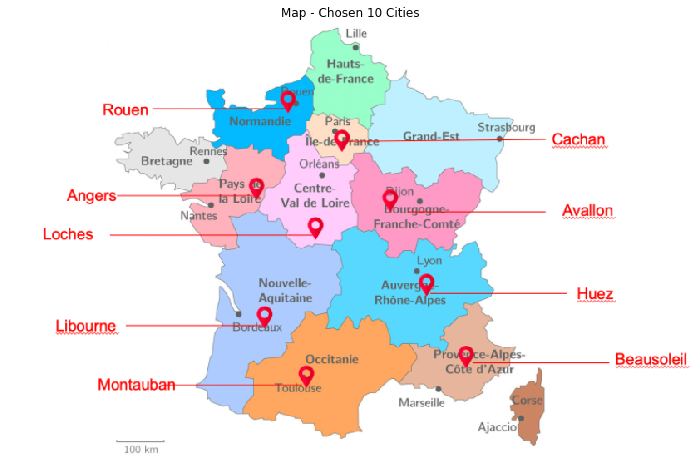

In [1]:
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg  
#fig = plt.figure(figsize=(5.5,3),dpi=300)

plt.rcParams['figure.figsize'] = (15, 8)
map_pic = mpimg.imread('Map-real estate.png')
plt.axis('off')
plt.title('Map - Chosen 10 Cities')
plt.imshow(map_pic)
plt.show()

#### Columns:
`Identifiant`:identification number for each house  
`City`: city
`Post_Code`: post code for the city  
`Address`: specific house address in the city  
`Sales_Date`: date the house was sold  
`House_Type`: house type (maison, appartement)  
`Price`: price of specific house   
`Number of rooms`: room number inside the house  
`House Inside Area`:inside area of the house  
`Population`: population of the city   
`Population_Density(km2)`:population density of the city  
`Altitude_min(m)`: minimum altitude of the city  
`Avg_Temperature`: annual average temperature of the city  
`Number_of_Schools`: number of schools in the city  
`Number_of_Hospital`: number of hospitals in the city  
`Region_Area(km2)`: area of the city  
`Precipitation`: annual average precipitation of the city  
`Avg_Monthly_Salary`: monthly average salary in the city  
`Avg_Age`: average age of the citizens

####  12 Factors for analysis:
`Number of rooms`,`House Inside Area`, `Population`,`Population_Density(km2)`, `Altitude_min(m)`,`Avg_Temperature`,  
`Number_of_Schools`, `Number_of_Hospital`,`Region_Area(km2)`, `Precipitation`, `Avg_Monthly_Salary`,`Avg_Age`

#### External sources:
https://www.journaldesfemmes.fr/maman/ecole/montauban/ville-82121  
https://ugeo.urbistat.com/AdminStat/en/fr/search?q=montauban  
http://www.journaldunet.com/business/salaire/angers/ville-49007  
https://demarchesadministratives.fr/hopital/huez-38750  
https://en.climate-data.org/search/?q=Montauban

## General Steps
Step1: Split dataset into 2 seperation by House Type

### Sub-dataset 1: df_Maison
Step2: Correlation study via charts and Pearson & Kendall Tau Method  
Step3: Multiple-Linear Regression model  
Step4: Test prediction accuracy 

### Sub-dataset 2: df_Appartement  
Step2: Correlation study via charts and Pearson & Kendall Tau Method  
Step3: Multiple-Linear Regression model  
Step4: Test prediction accuracy 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import datetime as dt

In [3]:
#df = pd.read_csv('C:/Users/Hester/MACHINE LEARNING/Real Estate Project/clean_10cities.csv')
df = pd.read_csv('clean_10cities.csv')
df

,Identifiant,City,Post_Code,Address,Sales_Date,House_Type,Price,Number_of_Rooms,House_Inside_Area,Population,Population_Density(km2),Altitude_min(m),Avg_Temperature,Number_of_Schools,Number_of_Hospital,Region_Area(km2),Precipitation,Avg_Monthly_Salary,Avg_Age
0,2020-118544,Huez,38750,42 IMP FONTAINE DU CORBEAU,30/06/2020,Appartement,127960,2,22,1303,93.0,1250,10.0,1,1,1.0,1394,2512,38.80
1,2020-118543,Huez,38750,42 IMP FONTAINE DU CORBEAU,30/06/2020,Appartement,58920,1,17,1303,93.0,1250,10.0,1,1,1.0,1394,2512,38.80
2,2020-118452,Huez,38750,5571 RES LES BALCONS DE LA SAGNE,29/06/2020,Appartement,69000,1,24,1303,93.0,1250,10.0,1,1,1.0,1394,2512,38.80
3,2020-118495,Huez,38750,636 RUE 93 EME RAM,26/06/2020,Appartement,95655,1,22,1303,93.0,1250,10.0,1,1,1.0,1394,2512,38.80
4,2020-118505,Huez,38750,635 RUE 93 EME RAM,24/06/2020,Appartement,100000,2,24,1303,93.0,1250,10.0,1,1,1.0,1394,2512,38.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2020-161852,Angers,49000,9 ALL GEORGES POMPIDOU,28/05/2020,Appartement,150000,2,51,154508,3618.0,12,12.4,115,6,42.7,703,2345,38.05
829,2020-162177,Angers,49000,13 CHE DU PETIT MONTREJEAU,27/05/2020,Appartement,151000,3,55,154508,3618.0,12,12.4,115,6,42.7,703,2345,38.05
830,2020-161842,Angers,49000,13 RUE MARCEL CHUTEAUX,27/05/2020,Maison,255000,5,78,154508,3618.0,12,12.4,115,6,42.7,703,2345,38.05
831,2020-161984,Angers,49000,4 PAS DU PIGEON FLEURI,27/05/2020,Maison,203800,3,63,154508,3618.0,12,12.4,115,6,42.7,703,2345,38.05


## Split dataset into 2 seperation by House Type
In order to have a better prediction, we decided to split our training dataset into 2 sub-datasets for both houses (Maison) and apartments,they are `df_Maison`, `df_Appartement`.


## Sub-dataset 1: df_Maison

In [4]:
df_Maison = df.loc[df["House_Type"] == "Maison"]
df_Maison

,Identifiant,City,Post_Code,Address,Sales_Date,House_Type,Price,Number_of_Rooms,House_Inside_Area,Population,Population_Density(km2),Altitude_min(m),Avg_Temperature,Number_of_Schools,Number_of_Hospital,Region_Area(km2),Precipitation,Avg_Monthly_Salary,Avg_Age
28,2020-117929,Huez,38750,5 RUE DES SAGNES,14/04/2020,Maison,708900,6,120,1303,93.0,1250,10.00,1,1,1.00,1394,2512,38.80
54,2020-313585,Avallon,89200,22 RUE JOHN KENNEDY,19/06/2020,Maison,81000,3,76,6513,1300.0,163,10.75,12,2,26.75,983,2071,45.00
55,2020-313662,Avallon,89200,12 RTE DE CHASSIGNY,16/06/2020,Maison,112000,3,85,6513,1300.0,163,10.75,12,2,26.75,983,2071,45.00
56,2020-313650,Avallon,89200,1 RTE DE CHAMPIEN,15/06/2020,Maison,279500,9,245,6513,1300.0,163,10.75,12,2,26.75,983,2071,45.00
57,2020-313627,Avallon,89200,6B RUE DE LA GOULOTTE,11/06/2020,Maison,259500,5,140,6513,1300.0,163,10.75,12,2,26.75,983,2071,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,2020-163525,Angers,49000,40 RUE MARC CHAGALL,29/05/2020,Maison,117000,4,94,154508,3618.0,12,12.40,115,6,42.70,703,2345,38.05
819,2020-161999,Angers,49000,58 RUE DU LUTIN,29/05/2020,Maison,428000,5,110,154508,3618.0,12,12.40,115,6,42.70,703,2345,38.05
827,2020-161891,Angers,49000,30 AV PASTEUR,28/05/2020,Maison,530000,9,220,154508,3618.0,12,12.40,115,6,42.70,703,2345,38.05
830,2020-161842,Angers,49000,13 RUE MARCEL CHUTEAUX,27/05/2020,Maison,255000,5,78,154508,3618.0,12,12.40,115,6,42.70,703,2345,38.05


### Correlation study via charts
The correlation bewteen `Price`of Maison dataset and the `12 features` mentioned above are each analyzed and labeled in diverse color in data visualizaion form with the help of jet map. 

As we can see in from the charts below, the most relevant feature could be `House_Inside_Area`, However, the more accurate judgement are necesary for further prediction. Therefore, the Correlation study methods `Pearson` & `Kendall Tau` are refered to identify the most related features to `Price`.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

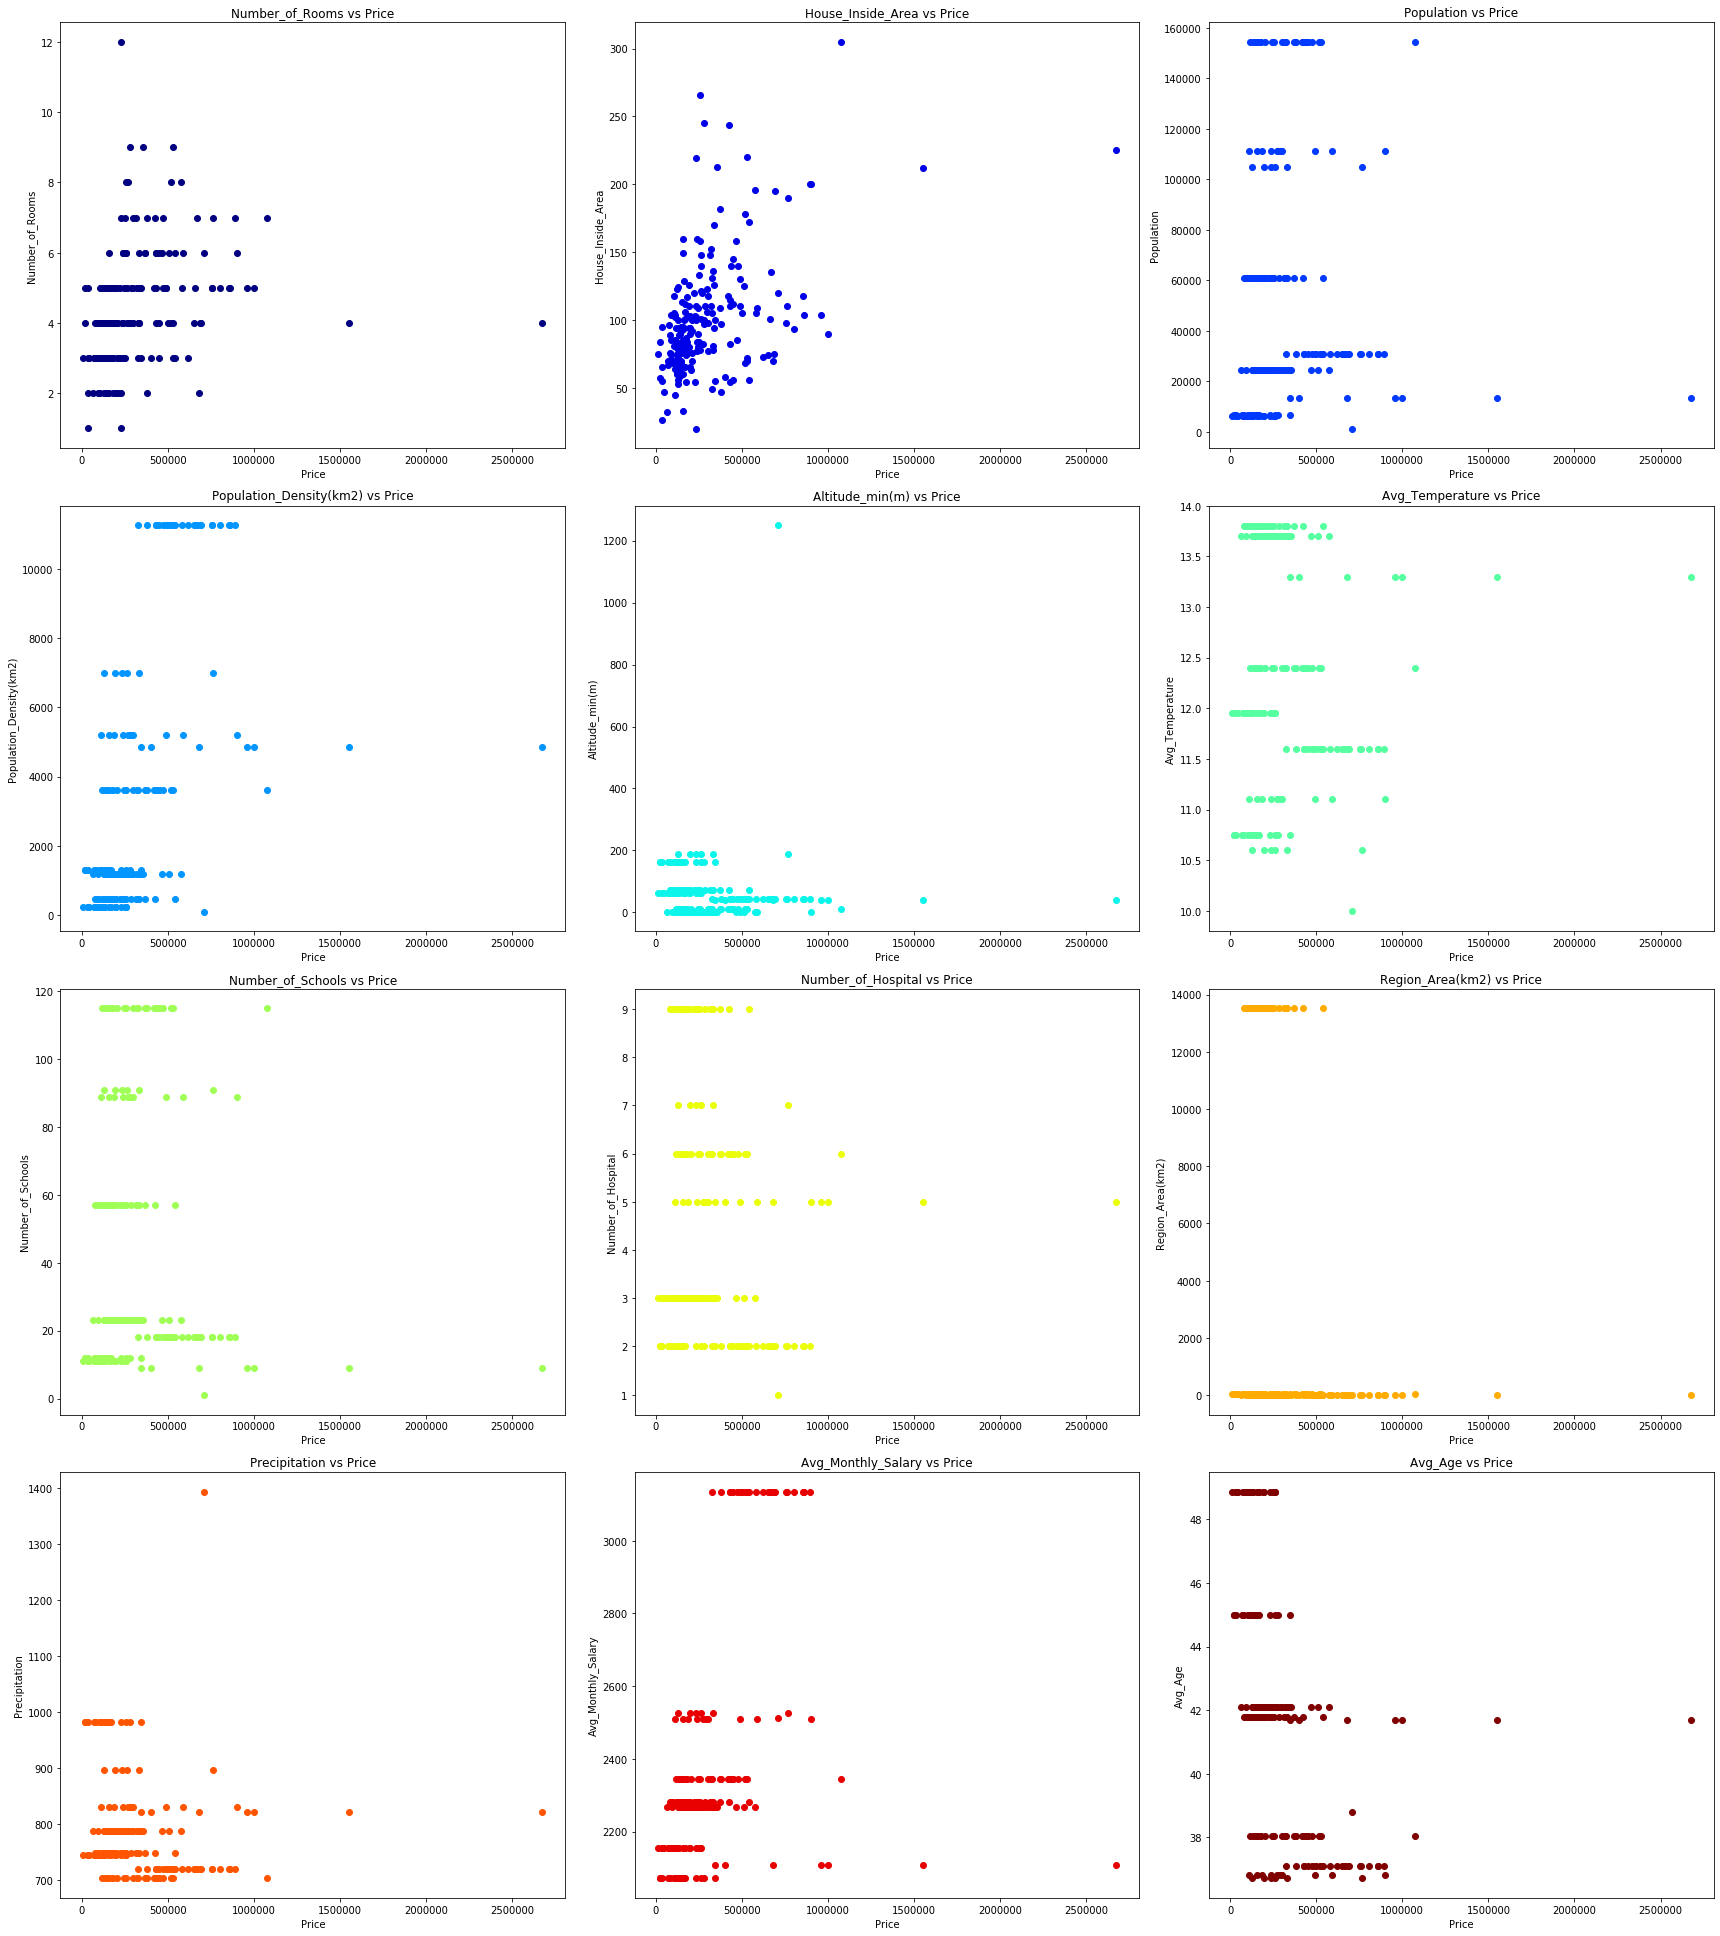

In [5]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,12)))
 
def correlation_plot(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(24,27))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Price"], asset, c = next(colors))
        ax.set_xlabel("Price")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs Price")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = df_Maison[['Number_of_Rooms','House_Inside_Area','Population','Population_Density(km2)','Altitude_min(m)',
                'Avg_Temperature','Number_of_Schools','Number_of_Hospital','Region_Area(km2)','Precipitation',
                'Avg_Monthly_Salary','Avg_Age']] 
 
correlation_plot(df_Maison,variables,4,3)

## Correlation study via Pearson & Kendall Tau Method

From the graph above and correlation computation below, most of our factors have a low correlation, this doesn't mean they are bad or useless but it means they are dependant of themselves. However, for our training model, we decided to use factors that have a correlation `>= 0.1` and `<=-0.1`, in other to predict with higher relevancy.

In [6]:
features = df_Maison.columns[-12:]
df_Maison.corr(method='pearson')['Price'].loc[features]

Number_of_Rooms            0.275704
House_Inside_Area          0.472809
Population                 0.067549
Population_Density(km2)    0.527423
Altitude_min(m)           -0.014319
Avg_Temperature           -0.058717
Number_of_Schools         -0.005639
Number_of_Hospital        -0.074249
Region_Area(km2)          -0.165268
Precipitation             -0.095061
Avg_Monthly_Salary         0.401794
Avg_Age                   -0.412813
Name: Price, dtype: float64

In [7]:
features = df_Maison.columns[-12:]
df.corr(method='kendall')['Price'].loc[features]

Number_of_Rooms            0.375729
House_Inside_Area          0.365040
Population                -0.033181
Population_Density(km2)    0.201123
Altitude_min(m)           -0.052893
Avg_Temperature            0.056355
Number_of_Schools         -0.107980
Number_of_Hospital        -0.089676
Region_Area(km2)          -0.205586
Precipitation             -0.148691
Avg_Monthly_Salary         0.067165
Avg_Age                   -0.080636
Name: Price, dtype: float64

## Multiple-Linear prediction model 
We use Multiple-Linear model to make the prediction with input of the 5 following relevant features to "Price", as respectively `x` and `y` values.

#### x values: 
`Number_of_Rooms`  
`House_Inside_Area`  
`Population_Density(km2)`  
`Region_Area(km2)`  

#### y values:  
`Price`

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
X_NRooms=np.array(df_Maison['Number_of_Rooms']).reshape(-1,1)
X_InsideArea=np.array(df_Maison['House_Inside_Area']).reshape(-1,1)
X_PopDensity=np.array(df_Maison['Population_Density(km2)']).reshape(-1,1)
X_Region_Area=np.array(df_Maison['Region_Area(km2)']).reshape(-1,1)
#X_AvgSalary=np.array(df_Maison['Avg_Monthly_Salary']).reshape(-1,1)
#X_AvgAge=np.array(df_Maison['Avg_Age']).reshape(-1,1)
new_y=np.array(df_Maison['Price']).reshape(-1,1)
#new_X=np.concatenate((X_NRooms,X_InsideArea,X_PopDensity, X_Region_Area, X_AvgSalary, X_AvgAge),axis=1)
new_X=np.concatenate((X_NRooms,X_InsideArea,X_PopDensity, X_Region_Area),axis=1)


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_X, new_y, test_size=0.25, random_state=15)

regr_Price_new = LinearRegression().fit(X_train_new,y_train_new)

regr_Price_pred_new = regr_Price_new.predict(X_test_new)

# The mean squared error
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(y_test_new, regr_Price_pred_new)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_new, regr_Price_pred_new))

sqrt(Mean squared error): 290182.49
Coefficient of determination: 0.47


### Result

The goodness of fit is `between (0.1 to 1)` and our coefficient of determination is `0.46`, this shows that 46% of our dataset fits properly into this regression model.

# Test Data

In [10]:
test = pd.read_csv('TestData.csv').dropna(axis=0)


In [11]:
test_Maison = test.loc[test["House_Type "] == "Maison"]

In [12]:
X_NRooms=np.array(test_Maison['Number_of_Rooms']).reshape(-1,1)
X_InsideArea=np.array(test_Maison['House_Inside_Area']).reshape(-1,1)
X_PopDensity=np.array(test_Maison['Population_Density(km2)']).reshape(-1,1)
X_Region_Area=np.array(test_Maison['Region_Area(km2)']).reshape(-1,1)
#X_AvgSalary=np.array(test_Maison['Avg_Monthly_Salary']).reshape(-1,1)
#X_AvgAge=np.array(test_Maison['Avg_Age']).reshape(-1,1)
test_y=np.array(test_Maison['Price']).reshape(-1,1)
test_X=np.concatenate((X_NRooms,X_InsideArea,X_PopDensity,X_Region_Area),axis=1)

In [13]:
regr_Price_pred_test=regr_Price_new.predict(test_X) 

In [14]:
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(test_y, regr_Price_pred_test)))
print('Coefficient of determination: %.2f'
      % r2_score(test_y, regr_Price_pred_test))

sqrt(Mean squared error): 130566.93
Coefficient of determination: 0.20





## -------------------------------------------------------------------------------------------------------------------------------

## Sub-dataset 1: df_Appartement


### Correlation study via charts
The correlation bewteen `Price`of Maison dataset and the `12 features` mentioned above are each analyzed and labeled in diverse color in data visualizaion form with the help pf jet map. 

As we can see in from the charts below, the most relevant feature could be `House_Inside_Area`, However, the more accurate judgement are necesary for further prediction. Therefore, the Correlation study methods `Pearson` & `Kendall Tau` are refered to identify the most related features to `Price`.

In [15]:
df_Appartement = df.loc[df['House_Type'] =='Appartement']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

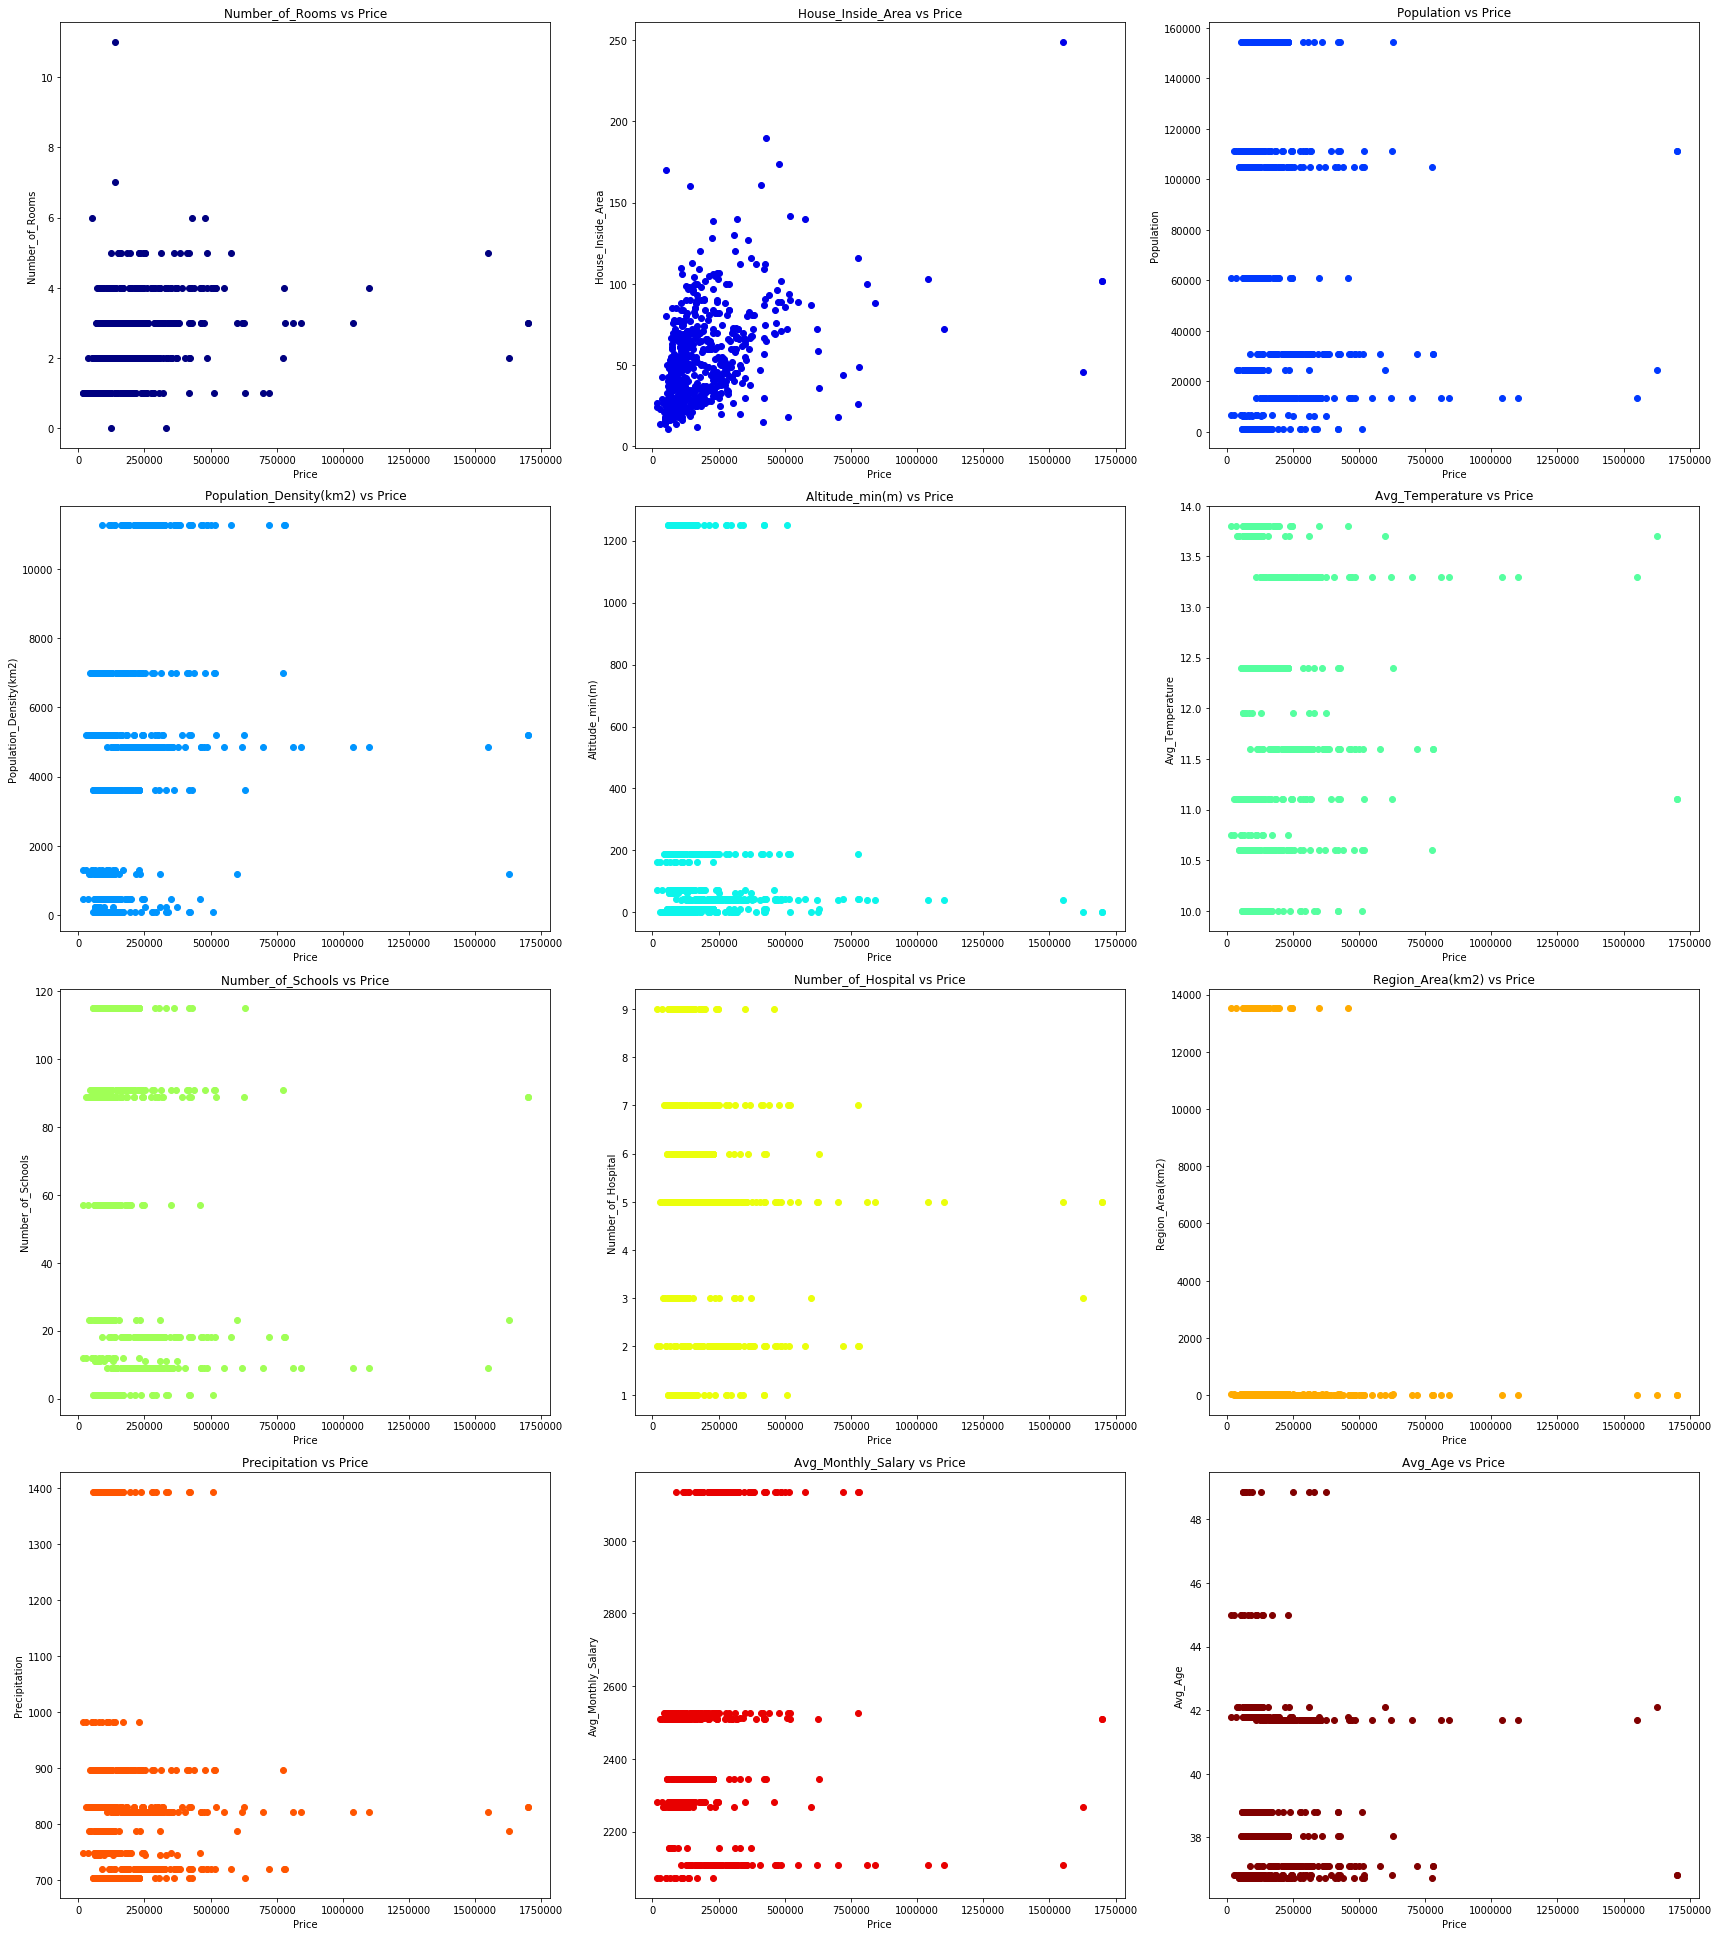

In [16]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,12)))
 
def correlation_plot(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(24,27))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Price"], asset, c = next(colors))
        ax.set_xlabel("Price")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs Price")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = df_Appartement[['Number_of_Rooms','House_Inside_Area','Population','Population_Density(km2)','Altitude_min(m)',
                'Avg_Temperature','Number_of_Schools','Number_of_Hospital','Region_Area(km2)','Precipitation',
                'Avg_Monthly_Salary','Avg_Age']] 
 
correlation_plot(df_Appartement,variables,4,3)

## Correlation study via Pearson & Kendall Tau Method

From the graph above and correlation computation below, most of our factors have a low correlation, this doesn't mean they are bad or useless but it means they are dependant of themselves. However, for our training model, we decided to use factors that have a correlation `>= 0.1` and `<=-0.1`, in other to predict with higher relevancy.

In [17]:
features = df_Appartement.columns[-12:]
df_Appartement.corr(method='pearson')['Price'].loc[features]

Number_of_Rooms            0.282260
House_Inside_Area          0.413173
Population                -0.155688
Population_Density(km2)    0.246798
Altitude_min(m)           -0.072568
Avg_Temperature            0.052395
Number_of_Schools         -0.186626
Number_of_Hospital        -0.132029
Region_Area(km2)          -0.135509
Precipitation             -0.080058
Avg_Monthly_Salary         0.114107
Avg_Age                   -0.020903
Name: Price, dtype: float64

In [18]:
features = df_Appartement.columns[-12:]
df_Appartement.corr(method='kendall')['Price'].loc[features]

Number_of_Rooms            0.342607
House_Inside_Area          0.335651
Population                -0.127027
Population_Density(km2)    0.188974
Altitude_min(m)            0.035438
Avg_Temperature            0.033433
Number_of_Schools         -0.169359
Number_of_Hospital        -0.133689
Region_Area(km2)          -0.248976
Precipitation             -0.119714
Avg_Monthly_Salary         0.044886
Avg_Age                   -0.031180
Name: Price, dtype: float64

## Multiple-Linear prediction model 
We use Multiple-Linear model to make the prediction with input of the 8 following relevant features to "Price", as respectively `x` and `y` values.

#### x values:
`Number_of_Rooms`  
`House_Inside_Area`  
`Population`  
`Population_Density(km2)`  
`Number_of_Schools`   
`Number_of_Hospital`  
`Region_Area(km2)`   

#### y values:  
`Price`

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X_NRooms=np.array(df_Appartement['Number_of_Rooms']).reshape(-1,1)
X_InsideArea=np.array(df_Appartement['House_Inside_Area']).reshape(-1,1)
X_Pop=np.array(df_Appartement['Population']).reshape(-1,1)
X_PopDensity=np.array(df_Appartement['Population_Density(km2)']).reshape(-1,1)
X_NSchools=np.array(df_Appartement['Number_of_Schools']).reshape(-1,1)
X_NHospital=np.array(df_Appartement['Number_of_Hospital']).reshape(-1,1)
X_RegionArea=np.array(df_Appartement['Region_Area(km2)']).reshape(-1,1)
#X_AvgSalary=np.array(df_Appartement['Avg_Monthly_Salary']).reshape(-1,1)

new_y=np.array(df_Appartement['Price']).reshape(-1,1)
new_X=np.concatenate((X_NRooms,X_InsideArea,X_Pop,X_PopDensity,X_NSchools,X_NHospital,X_RegionArea),axis=1)



X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_X, new_y, test_size=0.25, random_state=15)

regr_Price_new = LinearRegression().fit(X_train_new,y_train_new)

regr_Price_pred_new = regr_Price_new.predict(X_test_new)

# The mean squared error
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(y_test_new, regr_Price_pred_new)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_new, regr_Price_pred_new))

sqrt(Mean squared error): 120082.02
Coefficient of determination: 0.36


# Test Data

In [21]:
test_Apartment = test.loc[test["House_Type "] == "Appartement"]

In [22]:
X_NRooms=np.array(test_Apartment['Number_of_Rooms']).reshape(-1,1)
X_InsideArea=np.array(test_Apartment['House_Inside_Area']).reshape(-1,1)
X_Pop=np.array(test_Apartment['Population']).reshape(-1,1)
X_PopDensity=np.array(test_Apartment['Population_Density(km2)']).reshape(-1,1)
X_NSchools=np.array(test_Apartment['Number_of_Schools']).reshape(-1,1)
X_NHospital=np.array(test_Apartment['Number_of_Hospital']).reshape(-1,1)
X_RegionArea=np.array(test_Apartment['Region_Area(km2)']).reshape(-1,1)
#X_AvgSalary=np.array(test_Apartment['Avg_Monthly_Salary']).reshape(-1,1)

test_y=np.array(test_Apartment['Price']).reshape(-1,1)
test_X=np.concatenate((X_NRooms,X_InsideArea,X_Pop,X_PopDensity,X_NSchools,X_NHospital,X_RegionArea),axis=1)

In [23]:
regr_Price_pred_test = regr_Price_new.predict(test_X) 

In [24]:
print('sqrt(Mean squared error): %.2f'
      % np.sqrt(mean_squared_error(test_y, regr_Price_pred_test)))
print('Coefficient of determination: %.2f'
      % r2_score(test_y, regr_Price_pred_test))

sqrt(Mean squared error): 449321.79
Coefficient of determination: -0.11


### Conclusion
The relevant features influencing price of French house vary from house types, some of them are common, others are unique depending on the each certain house type as below.

#### Features relevant to ` Maison` Price:
`Number_of_Rooms`, `House_Inside_Area`, `Population_Density(km2)`, `Region_Area(km2)`

#### Features relevant to ` Appartement` Price:
`Number_of_Rooms`, `House_Inside_Area`, `Population`,` Population_Density(km2)`, `Number_of_Schools`,  
`Number_of_Hospital`, `Region_Area(km2)`


These models can be applied to predict the price of an appartment or house in France, also because our dataset comprises of big, medium and small cities in france, it's still able to give a balanced prediction when tested on any other dataset.

Furthermore, the final prediction accuracy strongly rely on the data richness, size, segmentation and other factors of data source impacting the model prediction performance, so not all french house price prediction with different data source selection are turn out the same values. This is the fact we need to understand.